In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



from torch import nn, optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE =\
["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [2]:
data = pd.read_csv("weatherAUS.csv")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [8]:
new_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday_No', 'RainToday_Yes'],
      dtype='object')

In [21]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [22]:
data=data.dropna(axis=0, how='any',inplace=False)

In [23]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [24]:
data.MinTemp.isnull().sum()

0

In [25]:
data.corr

<bound method DataFrame.corr of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
6049    2009-01-01    Cobar     17.9     35.2       0.0         12.0   
6050    2009-01-02    Cobar     18.4     28.9       0.0         14.8   
6052    2009-01-04    Cobar     19.4     37.6       0.0         10.8   
6053    2009-01-05    Cobar     21.9     38.4       0.0         11.4   
6054    2009-01-06    Cobar     24.2     41.0       0.0         11.2   
...            ...      ...      ...      ...       ...          ...   
142298  2017-06-20   Darwin     19.3     33.4       0.0          6.0   
142299  2017-06-21   Darwin     21.2     32.6       0.0          7.6   
142300  2017-06-22   Darwin     20.7     32.8       0.0          5.6   
142301  2017-06-23   Darwin     19.5     31.8       0.0          6.2   
142302  2017-06-24   Darwin     20.2     31.7       0.0          5.6   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
6049        12.3         SSW

In [26]:
cols = ['Rainfall', 'Humidity3pm', 'Pressure9am', 'RainToday', 'RainTomorrow']
data = data[cols]

In [27]:
data['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

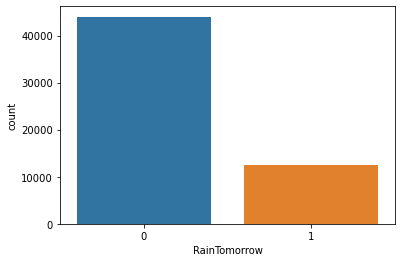

In [31]:
sns.countplot(data.RainTomorrow)

In [33]:
data.RainTomorrow.value_counts() / data.shape[0]

0    0.779741
1    0.220259
Name: RainTomorrow, dtype: float64

In [36]:
X = data[['Rainfall', 'Humidity3pm', 'RainToday', 'Pressure9am']]
y = data[['RainTomorrow']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [39]:
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())
X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([45136, 4]) torch.Size([45136])
torch.Size([11284, 4]) torch.Size([11284])


In [40]:
class Net(nn.Module):
    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, 5)
        self.fc2 = nn.Linear(5, 3)
        self.fc3 = nn.Linear(3, 1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return torch.sigmoid(self.fc3(x))

In [41]:
net = Net(X_train.shape[1])

In [42]:
net

Net(
  (fc1): Linear(in_features=4, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)

In [43]:
criterion = nn.BCELoss()

In [44]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [45]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [46]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [47]:
net = net.to(device)
criterion = criterion.to(device)

In [48]:
net

Net(
  (fc1): Linear(in_features=4, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)

In [49]:
criterion

BCELoss()

In [50]:
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(.5).view(-1)
    return (y_true == predicted).sum().float() / len(y_true)

In [51]:
def round_tensor(t, decimal_places=3):
    return round(t.item(), decimal_places)
for epoch in range(1000):
    y_pred = net(X_train)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train)
    if epoch % 100 == 0:
        train_acc = calculate_accuracy(y_train, y_pred)
        y_test_pred = net(X_test)
        y_test_pred = torch.squeeze(y_test_pred)
        test_loss = criterion(y_test_pred, y_test)
        test_acc = calculate_accuracy(y_test, y_test_pred)
        print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

epoch 0
Train set - loss: 2.509, accuracy: 0.78
Test  set - loss: 2.509, accuracy: 0.78

epoch 100
Train set - loss: 0.455, accuracy: 0.793
Test  set - loss: 0.455, accuracy: 0.795

epoch 200
Train set - loss: 0.432, accuracy: 0.802
Test  set - loss: 0.432, accuracy: 0.804

epoch 300
Train set - loss: 0.417, accuracy: 0.816
Test  set - loss: 0.418, accuracy: 0.816

epoch 400
Train set - loss: 0.409, accuracy: 0.828
Test  set - loss: 0.409, accuracy: 0.828

epoch 500
Train set - loss: 0.404, accuracy: 0.833
Test  set - loss: 0.405, accuracy: 0.832

epoch 600
Train set - loss: 0.402, accuracy: 0.835
Test  set - loss: 0.402, accuracy: 0.835

epoch 700
Train set - loss: 0.401, accuracy: 0.836
Test  set - loss: 0.401, accuracy: 0.837

epoch 800
Train set - loss: 0.4, accuracy: 0.836
Test  set - loss: 0.401, accuracy: 0.837

epoch 900
Train set - loss: 0.4, accuracy: 0.837
Test  set - loss: 0.4, accuracy: 0.837



In [52]:
MODEL_PATH = 'model.pth'
torch.save(net, MODEL_PATH)

In [53]:
net = torch.load(MODEL_PATH)

In [54]:
classes = ['No rain', 'Raining']
y_pred = net(X_test)
y_pred = y_pred.ge(.5).view(-1).cpu()
y_test = y_test.cpu()
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

     No rain       0.85      0.96      0.90      8799
     Raining       0.74      0.39      0.52      2485

    accuracy                           0.84     11284
   macro avg       0.80      0.68      0.71     11284
weighted avg       0.83      0.84      0.82     11284



Text(0.5, 46.5, 'Predicted label')

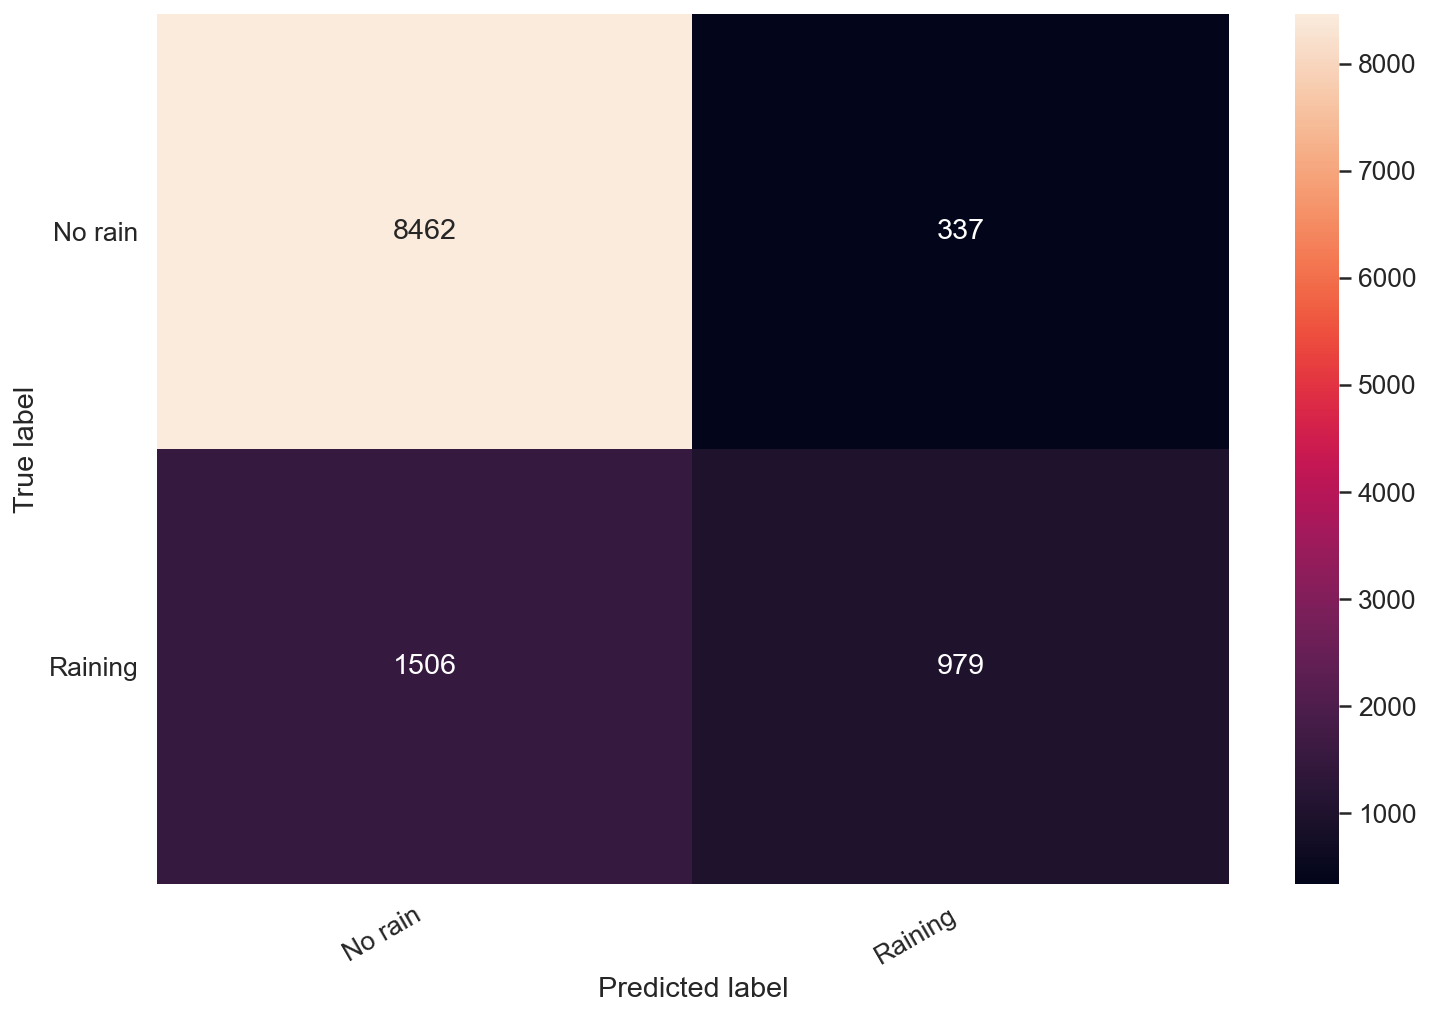

In [55]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [56]:
def will_it_rain(rainfall, humidity, rain_today, pressure):
    t = torch.as_tensor([rainfall, humidity, rain_today, pressure]) \
      .float() \
      .to(device)
    output = net(t)
    return output.ge(0.5).item()

In [57]:
will_it_rain(rainfall=10, humidity=10, rain_today=True, pressure=2)

True

In [58]:
will_it_rain(rainfall=0, humidity=1, rain_today=False, pressure=100)

False

In [15]:
pip install torch

In [16]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [17]:
import torch